# Assignment 2: Classification

# Import required libraries

Name/Mohamed Gomaa Mostafa
Id/2103129
Department/AI

In [221]:
import os
import numpy as np
import pandas as pd

import sklearn.linear_model
import sklearn.tree
import sklearn.metrics

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Starter code students need to edit

In [222]:
def calc_TP_TN_FP_FN(ytrue_N, yhat_N):
    TP = 0.0
    TN = 0.0
    FP = 0.0
    FN = 0.0
    for i in range(len(ytrue_N)):
      if yhat_N[i]==0 and ytrue_N[i]==0:
        TN +=1
      elif yhat_N[i]==1 and ytrue_N[i]==0:
        FP+=1
      elif yhat_N[i]==0 and ytrue_N[i]==1:
        FN+=1
      elif yhat_N[i]==1 and ytrue_N[i]==1:
        TP+=1
    return TP, TN, FP, FN

In [223]:
def calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Compute performance metrics for a given probabilistic classifier and threshold
    '''
    tp, tn, fp, fn = calc_TP_TN_FP_FN(ytrue_N, yproba1_N >= thresh)
    ## Compute ACC, TPR, TNR, etc.
    acc = (tp + tn) / float(tp + tn + fp + fn + 1e-10)
    tpr = tp / float(tp + fn + 1e-10)
    tnr = tn / float(fp + tn + 1e-10)
    ppv = tp / float(tp + fp + 1e-10)
    npv = tn / float(tn + fn + 1e-10)
    
    return acc, tpr, tnr, ppv, npv

def print_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Pretty print perf. metrics for a given probabilistic classifier and threshold
    '''
    acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh)
    
    ## Pretty print the results
    print("%.3f ACC" % acc)
    print("%.3f TPR" % tpr)
    print("%.3f TNR" % tnr)
    print("%.3f PPV" % ppv)
    print("%.3f NPV" % npv)

In [224]:
def calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Compute the confusion matrix for a given probabilistic classifier and threshold

    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh

    Returns
    -------
    cm_df : Pandas DataFrame
        Can be printed like print(cm_df) to easily display results
    '''
    cm = sklearn.metrics.confusion_matrix(ytrue_N, yproba1_N >= thresh)
    cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    return cm_df


In [225]:
def compute_perf_metrics_across_thresholds(ytrue_N, yproba1_N, thresh_grid=None):
    if thresh_grid is None:
        bin_edges = np.linspace(0, 1.001, 21)
        thresh_grid = np.sort(np.hstack([bin_edges, np.unique(yproba1_N)]))
    tpr_grid = np.zeros_like(thresh_grid)
    tnr_grid = np.zeros_like(thresh_grid)
    ppv_grid = np.zeros_like(thresh_grid)
    npv_grid = np.zeros_like(thresh_grid)
    acc_grid = np.zeros_like(thresh_grid)
    for tt, thresh in enumerate(thresh_grid):
        # Apply specific threshold to convert probas into hard binary values (0 or 1)
        # Then count number of true positives, true negatives, etc.
        # Then compute metrics like accuracy and true positive rate
        acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh)
        acc_grid[tt] = acc
        tpr_grid[tt] = tpr
        tnr_grid[tt] = tnr
        ppv_grid[tt] = ppv
        npv_grid[tt] = npv
    return thresh_grid, dict(
        acc=acc_grid,
        tpr=tpr_grid,
        tnr=tnr_grid,
        ppv=ppv_grid,
        npv=npv_grid)


def make_plot_perf_vs_threshold(ytrue_N, yproba1_N, bin_edges=np.linspace(0, 1, 21)):
    ''' Make pretty plot of binary classifier performance as threshold increases

    Produces a plot with 3 rows:
    * top row: hist of predicted probabilities for negative examples (shaded red)
    * middle row: hist of predicted probabilities for positive examples (shaded blue)
    * bottom row: line plots of metrics that require hard decisions (ACC, TPR, TNR, etc.)
    '''
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))
    sns.distplot(
        yproba1_N[ytrue_N == 0],
        color='r', bins=bin_edges, kde=False, rug=True, ax=axes[0]);
    sns.distplot(
        yproba1_N[ytrue_N == 1],
        color='b', bins=bin_edges, kde=False, rug=True, ax=axes[1]);

    thresh_grid, perf_grid = compute_perf_metrics_across_thresholds(ytrue_N, yproba1_N)
    axes[2].plot(thresh_grid, perf_grid['acc'], 'k-', label='accuracy')
    axes[2].plot(thresh_grid, perf_grid['tpr'], 'b-', label='TPR (recall/sensitivity)')
    axes[2].plot(thresh_grid, perf_grid['tnr'], 'g-', label='TNR (specificity)')
    axes[2].plot(thresh_grid, perf_grid['ppv'], 'c-', label='PPV (precision)')
    axes[2].plot(thresh_grid, perf_grid['npv'], 'm-', label='NPV')

    axes[2].legend()
    axes[2].set_ylim([0, 1])

# Problem 1: Binary Classifier for Cancer-Risk Screening

### Load the dataset

In [226]:
# Load 3 feature version of x arrays
x_tr_M3 = np.loadtxt('C:/Users/DELL G3/Desktop/Classification_lab_assignment/hw3/data_cancer/x_train.csv', delimiter=',', skiprows=1)
x_va_N3 = np.loadtxt('C:/Users/DELL G3/Desktop/Classification_lab_assignment/hw3/data_cancer/x_valid.csv', delimiter=',', skiprows=1)
x_te_N3 = np.loadtxt('C:/Users/DELL G3/Desktop/Classification_lab_assignment/hw3/data_cancer/x_test.csv', delimiter=',', skiprows=1)

# 2 feature version of x arrays
x_tr_M2 = x_tr_M3[:, :2].copy()
x_va_N2 = x_va_N3[:, :2].copy()
x_te_N2 = x_te_N3[:, :2].copy()

In [227]:
y_tr_M = np.loadtxt('C:/Users/DELL G3/Desktop/Classification_lab_assignment/hw3/data_cancer/y_train.csv', delimiter=',', skiprows=1)
y_va_N = np.loadtxt('C:/Users/DELL G3/Desktop/Classification_lab_assignment/hw3/data_cancer/y_valid.csv', delimiter=',', skiprows=1)
y_te_N = np.loadtxt('C:/Users/DELL G3/Desktop/Classification_lab_assignment/hw3/data_cancer/y_test.csv', delimiter=',', skiprows=1)

In [228]:
print("frac has_cancer on TRAIN: %.3f" % (np.count_nonzero(y_tr_M)/y_tr_M.shape[0])) # TODO edit the printed values
print("frac has_cancer on VALID: %.3f" % (np.count_nonzero(y_va_N)/y_va_N.shape[0]))
print("frac has_cancer on TEST : %.3f" % (np.count_nonzero(y_te_N)/y_te_N.shape[0]))

frac has_cancer on TRAIN: 0.141
frac has_cancer on VALID: 0.139
frac has_cancer on TEST : 0.139


## 1c : Logistic Regression

### Model Fitting for 1c(i)

In [231]:
C_grid = np.logspace(-9, 6, 31)

tr_loss_list = list()
va_loss_list = list()
for C in C_grid:
    lr = sklearn.linear_model.LogisticRegression(C=C)
    clf = lr.fit(x_tr_M2, y_tr_M)

    clf_pred=clf.predict_proba(x_te_N2)
    tr_loss_list.append(sklearn.metrics.log_loss(y_te_N,clf_pred))
    
    clf2=clf.predict_proba(x_va_N2)
    va_loss_list.append(sklearn.metrics.log_loss(y_va_N,clf2))


lowest_c_index=np.argmin(tr_loss_list)
best_c=C_grid[lowest_c_index]
lowest_c=np.log10(best_c)
print(lowest_c)



    # TODO fit, predict_proba, and evaluate logistic loss
    
# Record the best model here

6.0


best C for LR with 2 feature data: 6.000


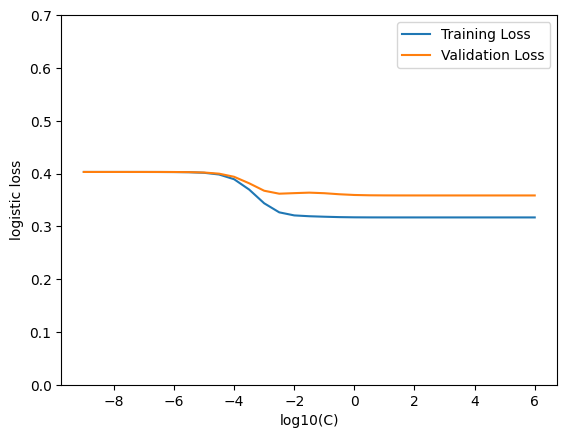

In [232]:
# TODO make plot
plt.plot(np.log10(C_grid),tr_loss_list)
plt.plot(np.log10(C_grid),va_loss_list)
plt.xlabel('log10(C)');
plt.ylabel('logistic loss');
plt.ylim([0.0, 0.7]);

# TODO add legend

#plt.legend(...);
plt.legend(["Training Loss","Validation Loss"])

print("best C for LR with 2 feature data: %.3f"% lowest_c)




C:\Users\DELL G3\AppData\Local\Temp\ipykernel_16536\2741492728.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
C:\Users\DELL G3\AppData\Local\Temp\ipykernel_16536\2741492728.py:40: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


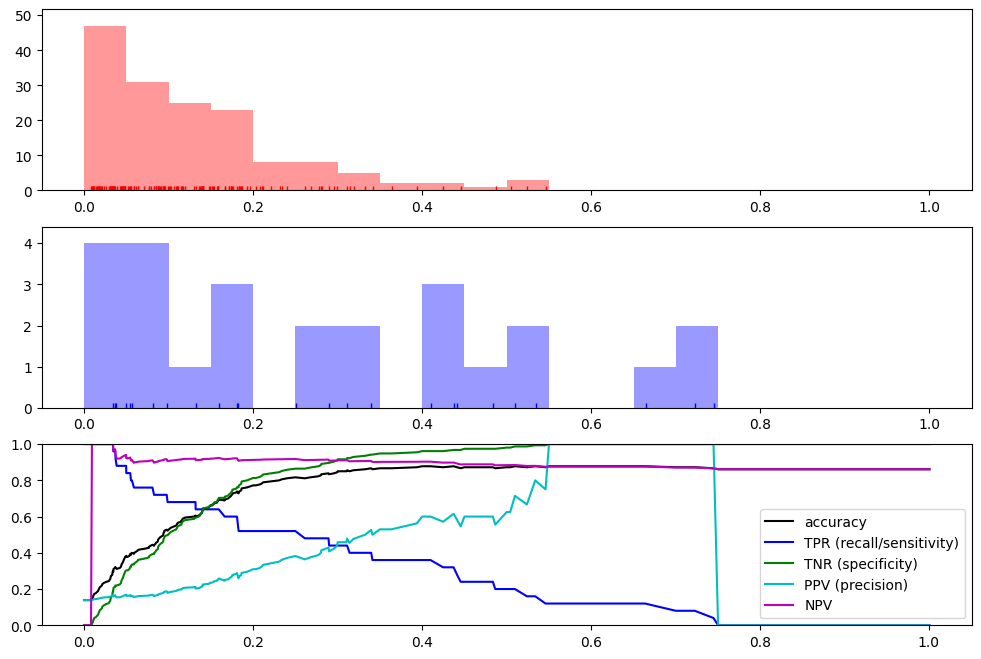

In [233]:
# TODO call make_plot_perf_vs_threshold(...)
lr2 = sklearn.linear_model.LogisticRegression(C=best_c)
cw=lr2.fit(x_tr_M2,y_tr_M)
clf_predw=cw.predict_proba(x_va_N2)[:,1]
make_plot_perf_vs_threshold(y_va_N, clf_predw)

### Model fitting for 1c(iii)

In [234]:
# TODO like 1c(i) but with 3 features\

C_grid_3f = np.logspace(-9, 6, 31)

tr_loss_list_3f = list()
va_loss_list_3f = list()
for C in C_grid_3f:
    lr_3f = sklearn.linear_model.LogisticRegression(C=C)
    clf_3f = lr_3f.fit(x_tr_M3, y_tr_M)

    clf_pred_3f=clf_3f.predict_proba(x_te_N3)
    tr_loss_list_3f.append(sklearn.metrics.log_loss(y_te_N,clf_pred_3f))

    clf2_3f=clf_3f.predict_proba(x_va_N3)
    va_loss_list_3f.append(sklearn.metrics.log_loss(y_va_N,clf2_3f))


lowest_c_index_3f=np.argmin(va_loss_list_3f)
best_c_3f=C_grid_3f[lowest_c_index_3f]
lowest_c_3f=np.log10(best_c_3f)
print(lowest_c_3f)


6.0


best C for LR with 3 feature data: 6.000


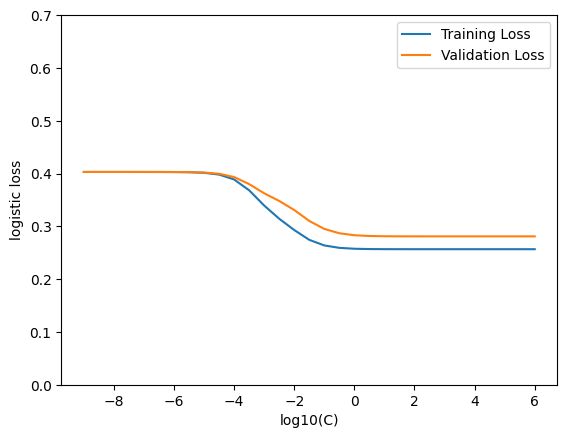

In [235]:
# TODO make plot

plt.plot(np.log10(C_grid_3f),tr_loss_list_3f)
plt.plot(np.log10(C_grid_3f),va_loss_list_3f)
plt.xlabel('log10(C)');
plt.ylabel('logistic loss');
plt.ylim([0.0, 0.7]);

# TODO add legend
#plt.legend(...);

plt.legend(["Training Loss","Validation Loss"])
print("best C for LR with 3 feature data: %.3f" % lowest_c_3f) # TODO




C:\Users\DELL G3\AppData\Local\Temp\ipykernel_16536\2741492728.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
C:\Users\DELL G3\AppData\Local\Temp\ipykernel_16536\2741492728.py:40: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


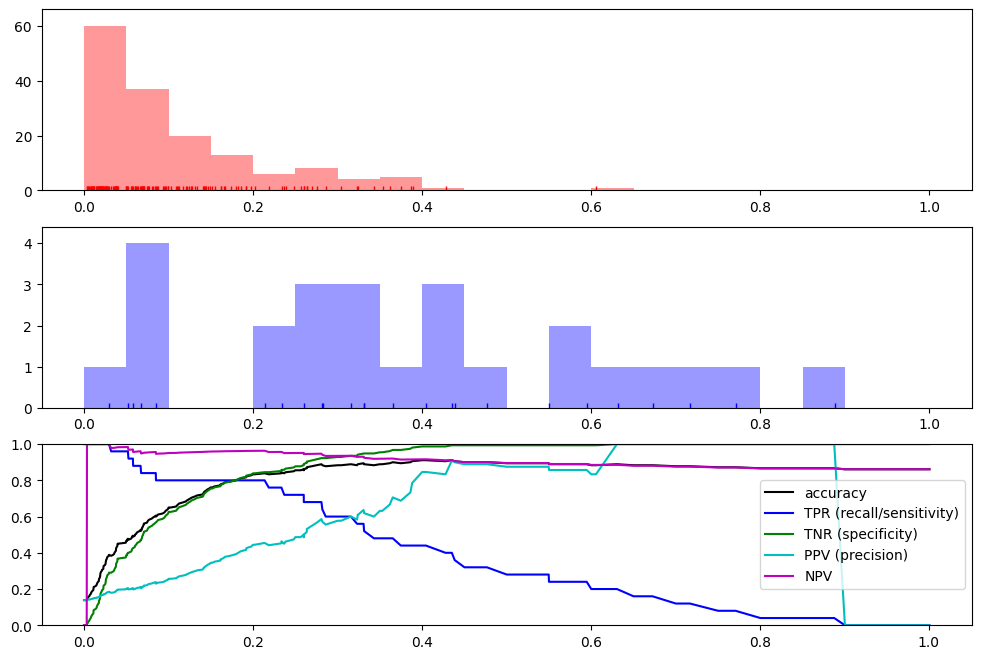

In [236]:
# TODO call make_plot_perf_vs_threshold(...)
lr2_3f = sklearn.linear_model.LogisticRegression(C=best_c_3f)
cw_3f=lr2_3f.fit(x_tr_M3,y_tr_M)
clf_predw_3f=cw_3f.predict_proba(x_va_N3)[:, 1]
make_plot_perf_vs_threshold(y_va_N, clf_predw_3f)

## Problem 1d: Decision Tree

### Model fitting code for decision tree 1d(i)

In [237]:
min_samples_leaf_grid = np.asarray([1, 2, 5, 10, 20, 50, 100, 200, y_tr_M.size])

tr_loss_list = list()
va_loss_list = list()
for min_samples_leaf in min_samples_leaf_grid:
    tree = sklearn.tree.DecisionTreeClassifier(
        criterion='entropy', min_samples_leaf=min_samples_leaf)

    clf_tr = tree.fit(x_tr_M3,y_tr_M)
    clf_tr_prob = clf_tr.predict_proba(x_te_N3)
    tr_loss_list.append(sklearn.metrics.log_loss(y_te_N,clf_tr_prob))

    clf_ve_prob = clf_tr.predict_proba(x_va_N3)
    va_loss_list.append(sklearn.metrics.log_loss(y_va_N,clf_ve_prob))

    # TODO fit, predict_proba, and compute logistic loss
the_best_tree = min_samples_leaf_grid[np.argmin(va_loss_list)]
print(min_samples_leaf_grid)

# TODO compute best value for min_samples_leaf



[  1   2   5  10  20  50 100 200 390]


best min_samples_leaf with 3 feature data: 100.000


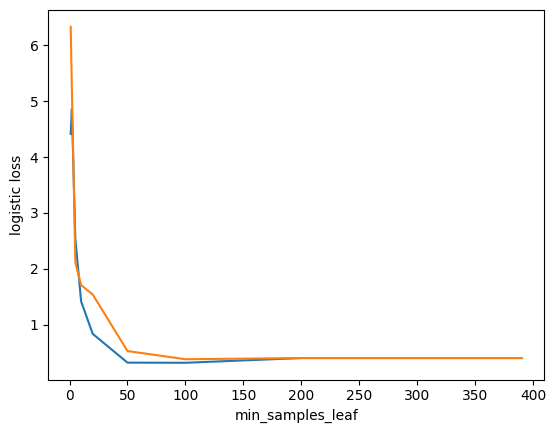

In [238]:
# TODO plot

plt.plot(min_samples_leaf_grid,tr_loss_list)
plt.plot(min_samples_leaf_grid,va_loss_list)

plt.xlabel('min_samples_leaf');
plt.ylabel('logistic loss');


print("best min_samples_leaf with 3 feature data: %.3f" % the_best_tree) # TODO

C:\Users\DELL G3\AppData\Local\Temp\ipykernel_16536\2741492728.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
C:\Users\DELL G3\AppData\Local\Temp\ipykernel_16536\2741492728.py:40: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


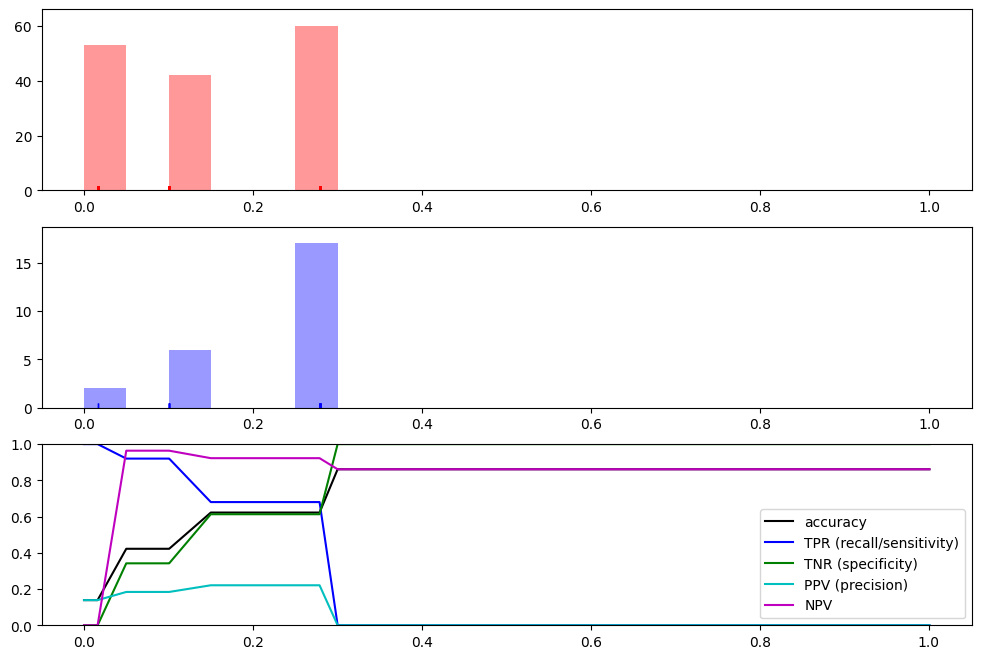

In [239]:
# TODO call make_plot_perf_vs_threshold

treew = sklearn.tree.DecisionTreeClassifier(
        criterion='entropy', min_samples_leaf=the_best_tree)

we=treew.fit(x_tr_M3,y_tr_M)
predvaT=we.predict_proba(x_va_N3)[:,1]

make_plot_perf_vs_threshold(y_va_N, predvaT)

# Problem 1e: ROC Curve analysis

### Problem 1e(i): ROC on Validation set

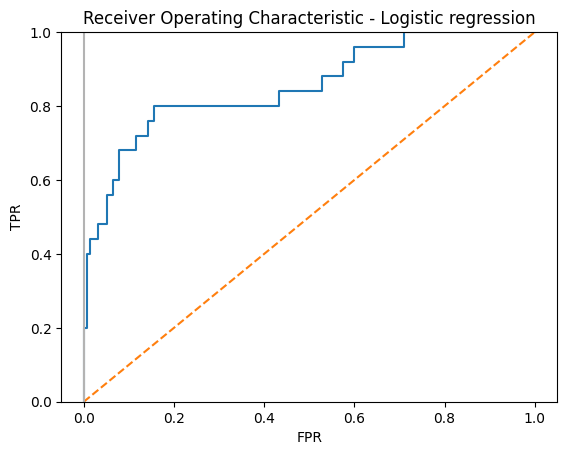

In [240]:
# TODO something like: fpr, tpr, thr = sklearn.metrics.roc_curve(...)
lr2_3f = sklearn.linear_model.LogisticRegression(C=best_c_3f)
cw_3f=lr2_3f.fit(x_tr_M3,y_tr_M)

y_score1 = cw_3f.predict_proba(x_va_N3)[:,1]
FPR, TPR, threshold1 = sklearn.metrics.roc_curve(y_va_N, y_score1)

plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(FPR, TPR)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0, 1]);
plt.xlabel("FPR");
plt.ylabel("TPR");
plt.show()




### Problem 1e(ii): ROC on Test set

<function matplotlib.pyplot.show(close=None, block=None)>

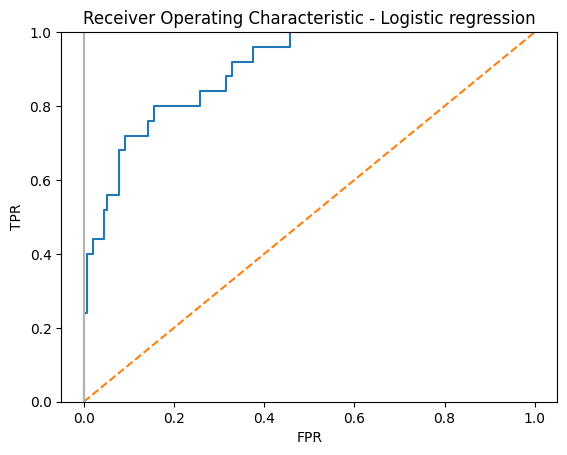

In [241]:
# TODO something like: fpr, tpr, thr = sklearn.metrics.roc_curve(...)
lr2_3f = sklearn.linear_model.LogisticRegression(C=best_c_3f)
cw_3f=lr2_3f.fit(x_tr_M3,y_tr_M)

y_score2 = cw_3f.predict_proba(x_te_N3)[:,1]
FPR, TPR, threshold1 = sklearn.metrics.roc_curve(y_te_N, y_score2)

plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(FPR, TPR)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0, 1]);
plt.xlabel("FPR");
plt.ylabel("TPR");
plt.show






## Problem 1f: Selecting a decision threshold

### Problem 1f(i): Use default 0.5 threshold. Report perf. for 3-feature Logistic Regr.

In [242]:
best_thr = 0.5
lr2_3f = sklearn.linear_model.LogisticRegression(C=best_c_3f)
cw_3f=lr2_3f.fit(x_tr_M3,y_tr_M)
vaprebo=cw_3f.predict_proba(x_va_N3)[:,1]
vw=calc_confusion_matrix_for_threshold(y_va_N,vaprebo,best_thr)
print("ON THE VALIDATION SET:\n",vw)

print(print_perf_metrics_for_threshold(y_va_N,vaprebo , best_thr))
print("Chosen best thr = %.4f" % best_thr)

print("")

teprebo=cw_3f.predict_proba(x_te_N3)[:,1]
tw=calc_confusion_matrix_for_threshold(y_te_N,teprebo,best_thr)
print("ON THE TEST SET:\n",tw)
print(print_perf_metrics_for_threshold(y_te_N,teprebo , best_thr))
# TODO: print(calc_confusion_matrix_for_threshold(...))



     
print("")
# TODO: print(print_perf_metrics_for_threshold(...))

ON THE VALIDATION SET:
 Predicted    0  1
True             
0          154  1
1           18  7
0.894 ACC
0.280 TPR
0.994 TNR
0.875 PPV
0.895 NPV
None
Chosen best thr = 0.5000

ON THE TEST SET:
 Predicted    0   1
True              
0          152   3
1           15  10
0.900 ACC
0.400 TPR
0.981 TNR
0.769 PPV
0.910 NPV
None



### Problem 1f(ii): Pick threshold to maximize TPR s.t. PPV >= 0.98. Report perf. for 3-feature Logistic Regr.

In [243]:
thresh_grid, perf_grid=compute_perf_metrics_across_thresholds(y_va_N,vaprebo)
m=perf_grid["ppv"]
ppvar=np.asarray(m)
maxppv=np.max(ppvar)
index_of_maxppv=np.where(ppvar==maxppv)

best_thr=thresh_grid[index_of_maxppv]
print(best_thr)





[0.63105052]


### Problem 1f(iii): Pick threshold to maximize PPV s.t. TPR >= 0.98. Report perf. for 3-feature Logistic Regr.

In [244]:
# TODO thresh_grid, perf_grid = compute_perf_metrics_across_thresholds(...)
thresh_grid, perf_grid=compute_perf_metrics_across_thresholds(y_va_N,vaprebo)

# TODO Find threshold that makes TPR as large as possible, while satisfying PPV >= 0.98
m=perf_grid["ppv"]
ppvar=np.asarray(m)
maxppv=np.max(ppvar)
index_of_maxppv=np.where(ppvar==maxppv)
best_thr=thresh_grid[index_of_maxppv]

lr2_3f = sklearn.linear_model.LogisticRegression(C=best_c_3f)
cw_3f=lr2_3f.fit(x_tr_M3,y_tr_M)
vaprebo=cw_3f.predict_proba(x_va_N3)[:,1]
vw=calc_confusion_matrix_for_threshold(y_va_N,vaprebo,best_thr)
print("ON THE VALIDATION SET:\n",vw)

print(print_perf_metrics_for_threshold(y_va_N,vaprebo , best_thr))
print("Chosen best thr = %.4f" % best_thr)

print("")

teprebo=cw_3f.predict_proba(x_te_N3)[:,1]
tw=calc_confusion_matrix_for_threshold(y_te_N,teprebo,best_thr)
print("ON THE TEST SET:\n",tw)
print(print_perf_metrics_for_threshold(y_te_N,teprebo , best_thr))

ON THE VALIDATION SET:
 Predicted    0  1
True             
0          155  0
1           20  5
0.889 ACC
0.200 TPR
1.000 TNR
1.000 PPV
0.886 NPV
None
Chosen best thr = 0.6311

ON THE TEST SET:
 Predicted    0  1
True             
0          155  0
1           20  5
0.889 ACC
0.200 TPR
1.000 TNR
1.000 PPV
0.886 NPV
None
